# Exercise 3

- A study on water quality of streams, a high level of bacter X was defined as a level greater than 100 per 100 ml of stream water. $n$ = 116 samples were taken from streams having a high environmental impact on pandas. Out of these, $y$ = 11 had a high bacter X level.

 - indicating with $p$ the probability that a sample of water taken from the stream has a high bacter X level,

#### (a) find the frequentist estimator for $p$

In [2]:
n <- 116    # number of samples
y <- 11     # number of samples with high bacter X level

From the theory, the frequentist estimator for $p$ is
$$ p_F = \frac{y}{n} $$
with variance
$$ Var[p_F] = \frac{p(1-p)}{n}

In [3]:
# frequentist estimator
p_F <- y / n
var_F <- p_F * (1- p_F) / n

cat(paste("The frequentist estimator for p is: ", round(p_F, 2), "+-", round(sqrt(var_F), 2)))

The frequentist estimator for p is:  0.09 +- 0.03

#### (b) using a Beta(1, 10) prior for $p$, calculate the posterior distribution $P (p|y)$


- The prior distribution for $p$ is a Beta($\alpha'$, $\beta'$)
$$ f(p) = \text{Beta}(\alpha' = 1, \beta' = 10) $$

- The likelihood is a binomial distribution
$$ P(y|p) = \text{Binom}(y|p, n) \propto p^y(1-p)^{n-y} $$

- Since the posterior distribution follows
$$ P(p|y) \propto P(y|p) \times f(p)$$
it becomes
$$P(p|y) \propto \text{Beta}(\alpha, \beta) \quad \text{with} \quad \alpha = y+\alpha' \quad \text{and} \quad \beta = n-y+\beta'$$

In [4]:
# parameters of the prior
alpha.i <- 1
beta.i <- 10

# parameters of the posterior
alpha <- y + alpha.i
beta <- n - y + beta.i

# x axis
step <- 1000
p <- seq(0, 0.25, 1/step)

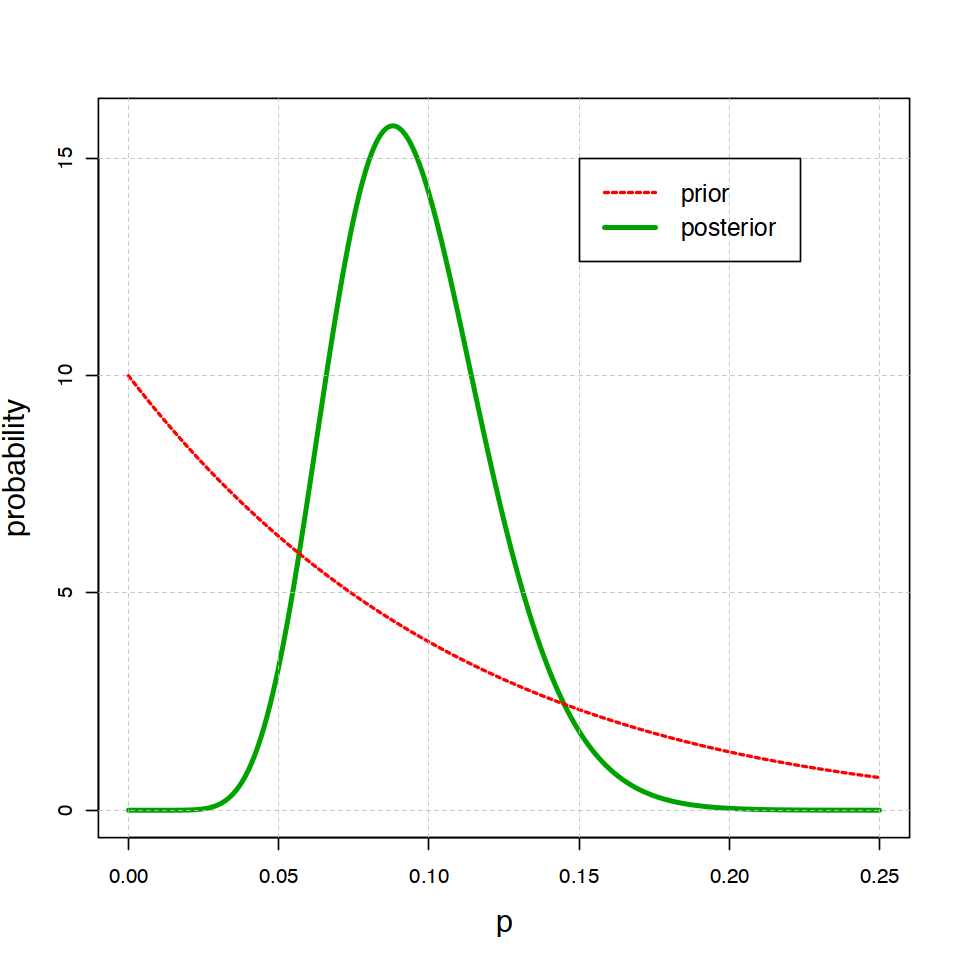

In [5]:
# compute and plot the prior and posterior 
prior <- dbeta(p, alpha.i, beta.i)
posterior <- dbeta(p, alpha, beta)

options(repr.plot.width = 8, repr.plot.height = 8)
plot(p, posterior,
    type = 'l', lwd = 3,
    col = '#00a200',
	ylab = 'probability', cex.lab = 1.5)
lines(p, prior,
    type = 'l', lwd = 2, lty = 2,
    col = 'red')
grid(nx = NULL, ny = NULL,
	lty = 2, lwd = 0.5,
	col = 'gray')
legend(0.15, 15,
	legend = c('prior', 'posterior'),
	col = c('red', '#00a200'),
	lty = c(2, 1), lwd = c(2, 3), cex = 1.2)

#### (c) find the bayesian estimator for $p$, the posterior mean and variance, and a 95% credible interval

From the theory we know that a bayesian estimator for $p$ is
$$ p_B = \frac{\alpha}{\alpha + \beta } $$

In [6]:
# bayesian estimator 
p_B <- alpha / (alpha + beta)

##### Useful functions

In [7]:
# function to find the mean of the distributions
find_mean <- function(p, a, b){
    mean <- integrate(function(p) dbeta(p, a, b) * p, 0, 0.25)
    return(mean)
}

In [8]:
# function to find the variance 
find_var <- function(p, a, b){
    E2 <- integrate(function(p) dbeta(p, a, b) * p^2, 0, 0.25)
    var <- E2$value - find_mean(p, a, b)$value^2
    return(var)
}

In [9]:
# function to find the cdf
find_cum <- function(f){
    cum <- rep(0, length(f))
    for(i in 2:length(f)){
     cum[i] <- cum[i-1] + f[i]/step
    }
    return(cum)
}

# function to find the credibility interval
find_interval <- function(cum, f, percentage){
    for(i in 1: length(cum(f))){
        if(cum(f)[i] > percentage){
            break
        }
    }
    return(p[i])
}

In [10]:
mean <- find_mean(p, alpha, beta)
variance <- find_var(p, alpha, beta)
min <- find_interval(find_cum, posterior, 0.025)
max <- find_interval(find_cum, posterior, 0.975)

cat(paste("The mean of the posterior distribution is: ", round(mean$value, 4), '\n'))
cat(paste("The variance of the posterior distribution is: ", round(variance, 6), '\n'))
cat(paste("The 95% confidence interval is: ", round(min, 3), "-", round(max, 3), '\n'))

cat(paste("The bayesian estimator for p is: ", round(p_B,2), "+-", round(sqrt(variance), 2)))


The mean of the posterior distribution is:  0.0945 
The variance of the posterior distribution is:  0.000668 
The 95% confidence interval is:  0.05 - 0.151 
The bayesian estimator for p is:  0.09 +- 0.03

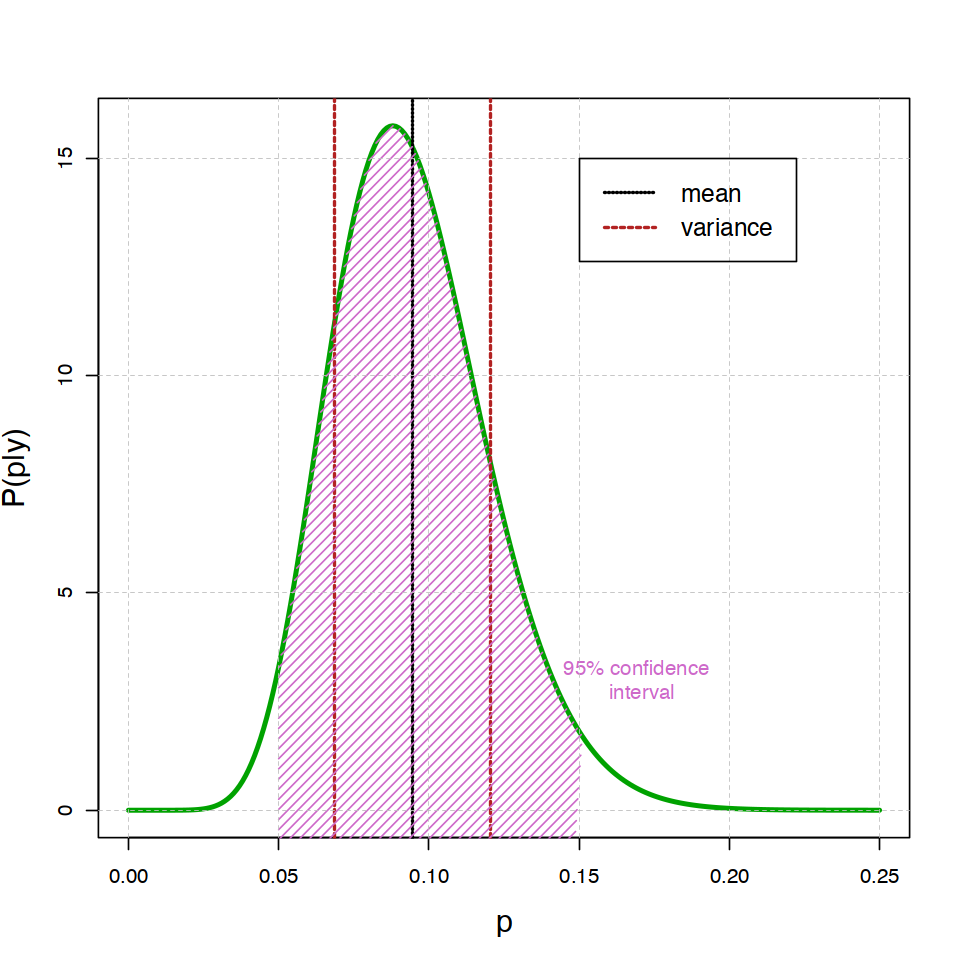

In [11]:
options(repr.plot.width = 8, repr.plot.height = 8)
plot(p, posterior,
    type = 'l', lwd = 3,
    col = '#00a200',
	ylab = 'P(p|y)', cex.lab = 1.5)
abline(v = mean$value,
    lwd = 2, lty = 3)
abline(v = mean$value - sqrt(variance),
    lwd = 2, lty = 2,
    col = 'firebrick')
abline(v = mean$value + sqrt(variance),
    lwd = 2, lty = 2,
    col = 'firebrick')   
polygon(c(p[p >= min & p <= max],
		min),
	c(posterior[p >= min & p <= max],
		-100),
    col = "orchid3", density = 20, angle = 45,
    border = 0.5,
    text(x = 0.17, y = 3, paste("95% confidence \n interval"), col = "orchid3"))
grid(nx = NULL, ny = NULL,
	lty = 2, lwd = 0.5,
	col = 'gray')
legend(0.15, 15,
	legend = c('mean', 'variance'),
	col = c('black', 'firebrick'),
	lty = c(3, 2), lwd = 2, cex = 1.2)

#### (d) test the hypotesis $$H_0: p=0.1 \quad \text{versus} \quad H_1: p\neq 0.1$$ at 5% level of significance with both the frequentist and bayesian approach

##### Frequentist approach

Since y = 11 lies in the acceptance region (P(y=11|n,p_0) = 12.3 %), we cannot reject the null hypotesis at the 5% level of significance

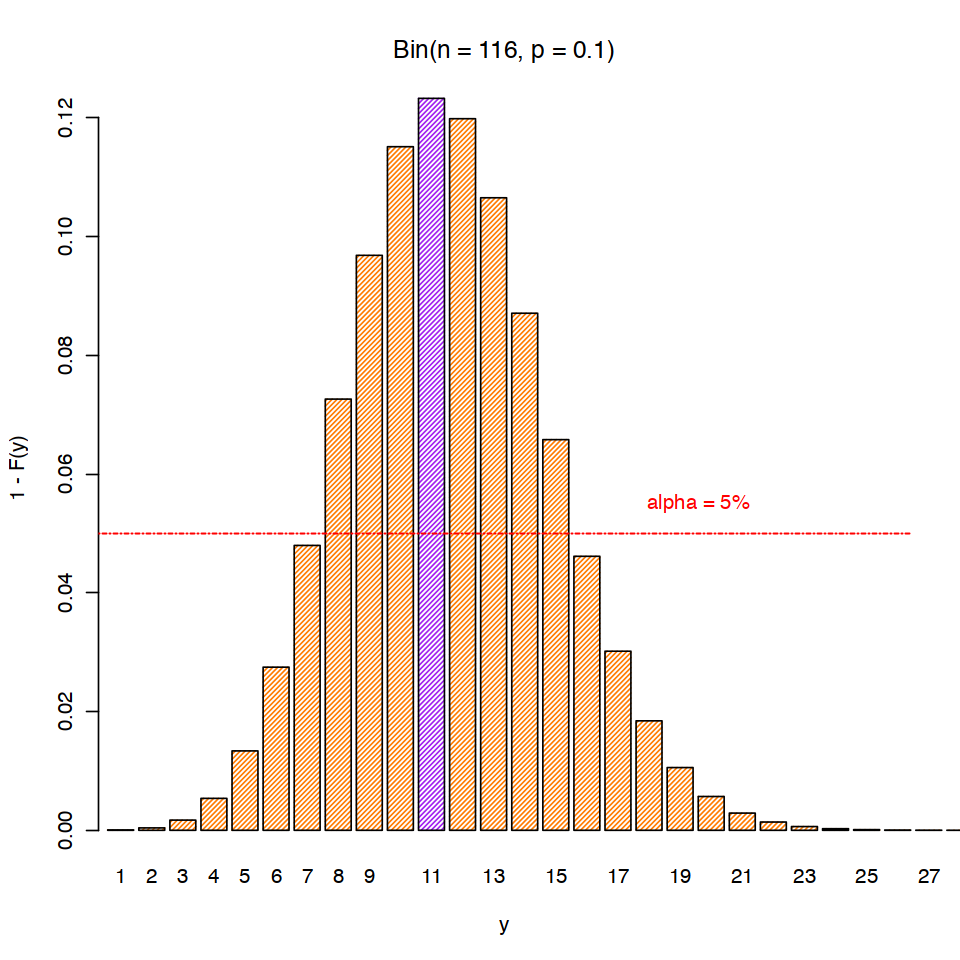

In [12]:
p_0 <- 0.1
y_samples <- 1:n

# null distribution
null <- dbinom(y_samples, n, p_0)
y_prob <- dbinom(y, n, p_0)

# plot
barplot(null, names = y_samples,
	col = c(rep("#ff7b00", 10), 'purple', rep("#ff7b00", 105)), angle = 45, density = 40,
	xlab = "y", ylab = "1 - F(y)",
	main = "Bin(n = 116, p = 0.1)",
    xlim = c(1, 30))
abline(h = 0.05,
	col = "red", lwd = 1.2, lty = 4,
	text(x = 23, y = 0.055, label = "alpha = 5%", col = "red"))

cat(paste("Since y = 11 lies in the acceptance region (P(y=11|n,p_0) =", round(y_prob*100, 1), "%), we cannot reject the null hypotesis at the 5% level of significance"))

##### Bayesian approach 

If $p_0$ lies in the 95% credibility interval, we cannot reject the null hypothesis $H_0$

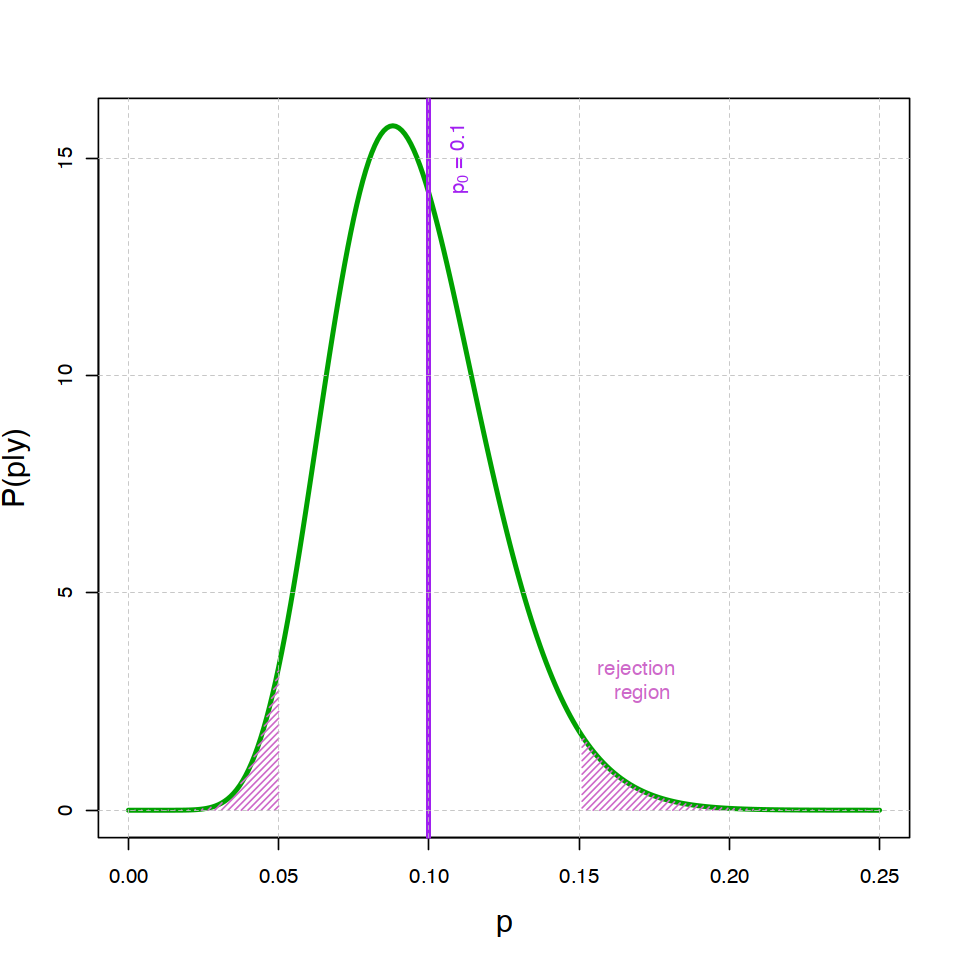

In [13]:
plot(p, posterior,
    type = 'l', lwd = 3,
    col = '#00a200',
	ylab = 'P(p|y)', cex.lab = 1.5)
abline(v = p_0,
    lwd = 3, col = 'purple',
	text(x = 0.11 , y = 15, srt = 90, expression(paste(p[0], " = 0.1")), col = 'purple'))  
polygon(c(p[p <= min], min),
	c(posterior[p <= min], 0),
    col = "orchid3", density = 30, angle = 45,
    border = 0.5,
    text(x = 0.17, y = 3, paste("rejection \n region"),
	col = "orchid3"))
polygon(c(p[p >= max], max),
	c(posterior[p >= max], 0),
    col = "orchid3", density = 30, angle = 45,
    border = 0.5)
grid(nx = NULL, ny = NULL,
	lty = 2, lwd = 0.5,
	col = 'gray')

Since the 95% credibility interval for $p$ is 0.05 - 0.15, $p_0$ crearly lies in this region, so we cannot reject the null hypothesis

- a new measurement, performed one month later on $n_{new}$ = 165 water samples, gives $y_{new}$ = 9 high bacter X level

#### (e) find the frequentist estimator for $p$


In [14]:
# new parameters
n.new <- 165
y.new <- 9

In [15]:
# new frequentist estimator
p_F.new <- y.new / n.new
var_F.new <- p_F.new * (1- p_F.new) / n.new

cat(paste("The frequentist estimator for p is: ", round(p_F.new, 2), "+-", round(sqrt(var_F.new), 2)))

The frequentist estimator for p is:  0.05 +- 0.02

#### (f) find a bayesian estimator for $p$, assuming both a Beta(1,10) prior for $p$, and assuming the posterior probability of the older measurement as the prior for the new one.

Both the $i$ posteriors are Beta $(\alpha_i, \beta_i)$ distributions with different parameters $a$ and $b$
- in the first case $$\alpha_1 =  y_{new} + \alpha' \quad \text{and} \quad \beta_1 = n_{new} - y_{new} + \beta' $$
- in the second case  $$\alpha_2 =  y_{new} + \alpha \quad \text{and} \quad \beta_2 = n_{new} - y_{new} + \beta $$

In [16]:
# define the new parameters for the Beta(a, b) posteriors
alpha.new <- c(y.new + alpha.i, y.new + alpha)
beta.new <- c(n.new - y.new + beta.i, n.new - y.new + beta)

In [17]:
# compute the bayesian estimator for p
p_B.new <- alpha.new / (alpha.new + beta.new)
var_B.new <- c(0,0)
for(i in 1:2){
    var_B.new[i] <- find_var(p, alpha.new[i], beta.new[i])
}

In [18]:
cat(paste("The bayesian estimator for p is: ", round(p_B.new[1], 2), "+-", round(sqrt(var_B.new[1]), 2), "using a Beta(1,10) prior \n and", round(p_B.new[2], 2), "+-", round(sqrt(var_B.new[2]), 2), "using the previous posterior as prior"))

The bayesian estimator for p is:  0.06 +- 0.02 using a Beta(1,10) prior 
 and 0.07 +- 0.02 using the previous posterior as prior

#### (g) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

In [19]:
# compute the posteriors
posterior.new <- matrix(data = NA, nrow = length(p), ncol = 2)
posterior.new[, 1] <- dbeta(p, alpha.new[1], beta.new[1])
posterior.new[, 2] <- dbeta(p, alpha.new[2], beta.new[2])

In [20]:
# find the means and the 95% credibility intervals
mean.new <- c(0, 0)
min.new <- c(0, 0)
max.new <- c(0, 0)

for(i in 1:2){
    mean.new[i] <- find_mean(p, alpha.new[i], beta.new[i])$value
    min.new[i] <- find_interval(find_cum, posterior.new[, i], 0.025)
    max.new[i] <- find_interval(find_cum, posterior.new[, i], 0.975)
}

cat(paste("The posterior mean for p is: ", round(mean.new[1], 2),
    "using a Beta(1,10) prior and", round(mean.new[2], 2),
    "using the previous posterior as prior \n"))
cat(paste("The 95% confidence interval is: ", round(min.new[1], 3), "-", round(max.new[1], 3),
    "using a Beta(1,10) prior and", round(min.new[2], 3), "-", round(max.new[2], 3), 
    "using the previous posterior as prior"))

The posterior mean for p is:  0.06 using a Beta(1,10) prior and 0.07 using the previous posterior as prior 
The 95% confidence interval is:  0.028 - 0.095 using a Beta(1,10) prior and 0.045 - 0.104 using the previous posterior as prior

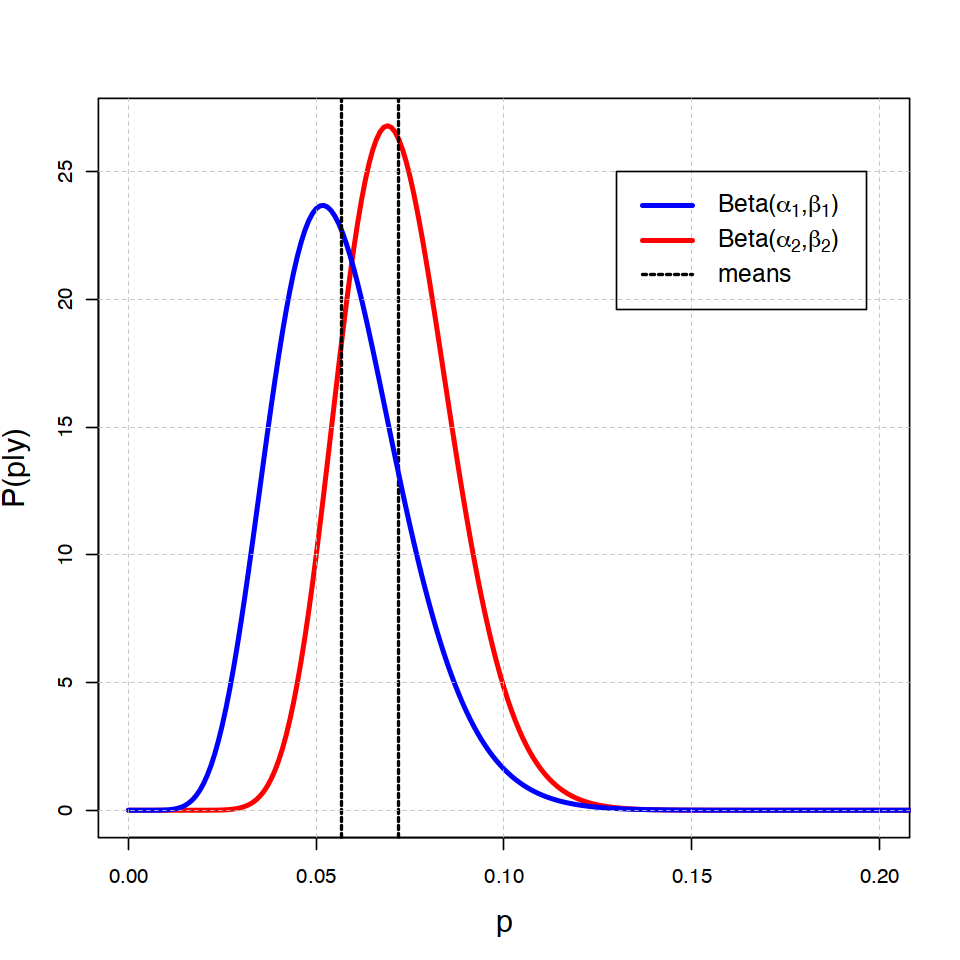

In [21]:
plot(p, posterior.new[, 2],
    type = 'l', lwd = 3,
    col = 'red',
    xlim = c(0, 0.2),
    ylab = 'P(p|y)', cex.lab = 1.5)
abline(v = mean.new[2],
    lwd = 2, lty = 2)  
lines(p, posterior.new[, 1],
    type = 'l', lwd = 3,
    col = 'blue',
	ylab = 'P(p|y)', cex.lab = 1.5)
abline(v = mean.new[1],
    lwd = 2, lty = 2) 
grid(nx = NULL, ny = NULL,
	lty = 2, lwd = 0.5,
	col = 'gray')
legend(0.13, 25,
	legend = c(expression(paste("Beta(", alpha[1], ",", beta[1], ")")), expression(paste("Beta(", alpha[2], ",", beta[2], ")")), "means"),
	col = c("blue", "red", 'black'),
	lty = c(1, 1, 2), lwd = c(3, 3, 2), cex = 1.2)

#### (h) test the hypotesis $$H_0 :p=0.1 \quad \text{versus} \quad H1 :p\neq0.1$$ at 5% level of significance with both the frequentist and bayesian approach

##### Frequentist approach

In [22]:
p_0 <- 0.1
y_samples.new <- 1:n.new

# null distribution
null.new <- dbinom(y_samples.new, n.new, p_0)
y_prob.new <- dbinom(y.new, n.new, p_0)

In [23]:
# function to calculate the rejection region
find_rej_region <- function(f, y, percentage){
    sum <- 0
    for(i in y){
        sum <- sum + f[i]
        if(sum > percentage){
            break
        }
    }
    if(percentage == 0.025){
        return(y[i-1])
    }
    if(percentage == 0.975){
        return(y[i+1])
    }
        
}

In [24]:
# calculate the rejection region
min_y <- find_rej_region(null.new, y_samples.new, 0.025)
max_y <- find_rej_region(null.new, y_samples.new, 0.975)

# redefine the level of significance
tail1 <- 0
tail2 <- 0

for(i in 1:min_y){
    tail1 <- tail1 + null.new[i]
}
for(i in max_y:length(y_samples.new)){
    tail2 <- tail2 + null.new[i]
}

signif.new <- tail1 + tail2

cat(paste("The rejection region for y is:", min_y, "-", max_y, "and the new level of significance alpha is:", round(signif.new*100, 1), '% \n'))

The rejection region for y is: 8 - 25 and the new level of significance alpha is: 3.7 % 


Since $y=9$ doesn't lie in the rejection region $$ \{y \leq 8\} \cup \{y \geq 25\}$$ we cannot reject the null hypothesis with a level of significance $\alpha = 3.7 \% $

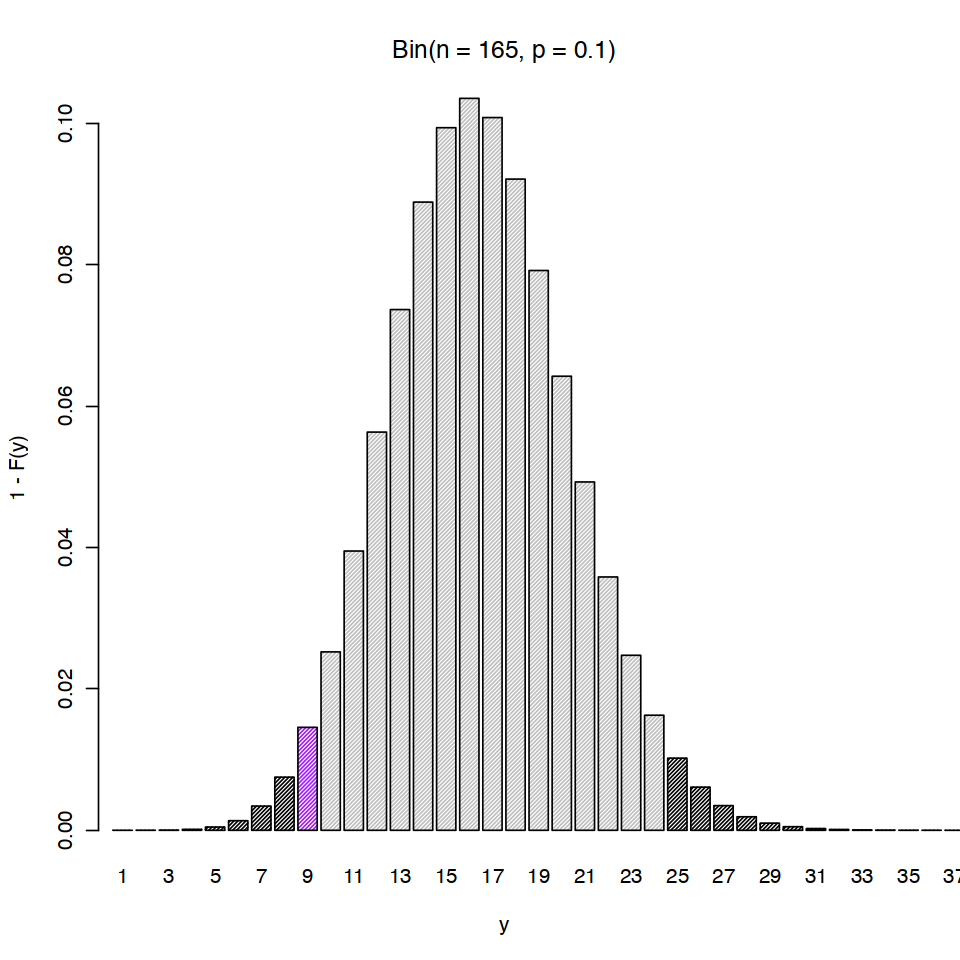

In [25]:
# plot
barplot(null.new, names = y_samples.new,
	col = c(rep("black", 8), 'purple', rep("gray", 15), rep('black', 141)), angle = 45, density = 50,
	xlab = "y", ylab = "1 - F(y)",
	main = "Bin(n = 165, p = 0.1)",
    xlim = c(1, 40))

##### Bayesian approach

If $p_0$ lies in the 95% credibility interval, we cannot reject the null hypothesis $H_0$

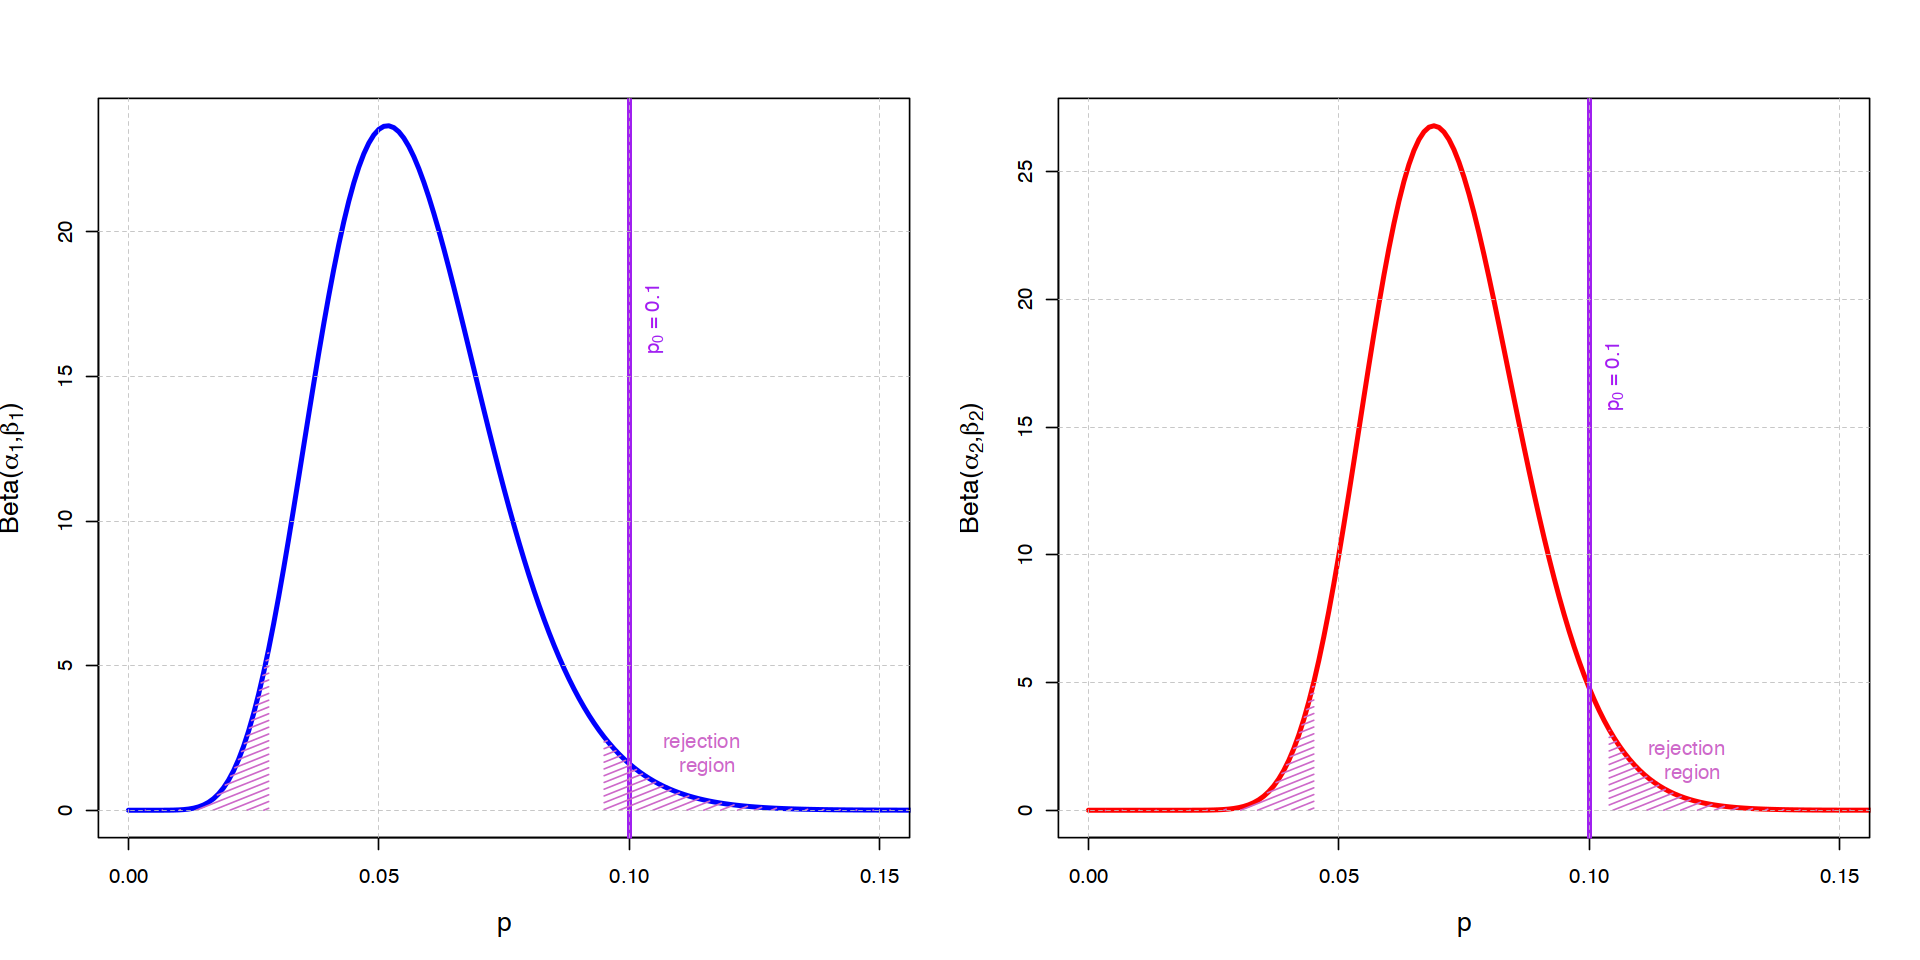

In [26]:
options(repr.plot.width = 16, repr.plot.height = 8)
par(mfrow = c(1,2), oma = c(0, 0, 0, 0))

# plot posterior 1
plot(p, posterior.new[,1],
    type = 'l', lwd = 3,
    col = 'blue',
    xlim = c(0, 0.15),
	ylab = expression(paste("Beta(", alpha[1], ",", beta[1], ")")), cex.lab = 1.3)
abline(v = p_0,
    lwd = 3, col = 'purple',
	text(x = 0.105 , y = 17, srt = 90, expression(paste(p[0], " = 0.1")), col = 'purple'))  
polygon(c(p[p <= min.new[1]], min.new[1]),
	c(posterior.new[,1][p <= min.new[1]], 0),
    col = "orchid3", density = 30, angle = 45,
    border = 0.5,
    text(x = 0.115, y = 2, paste("rejection \n region"),
	col = "orchid3"))
polygon(c(p[p >= max.new[1]], max.new[1]),
	c(posterior.new[,1][p >= max.new[1]], 0),
    col = "orchid3", density = 30, angle = 45,
    border = 0.5)
grid(nx = NULL, ny = NULL,
	lty = 2, lwd = 0.5,
	col = 'gray')

# plot posterior 2
plot(p, posterior.new[,2],
    type = 'l', lwd = 3,
    col = 'red',
    xlim = c(0, 0.15),
	ylab = expression(paste("Beta(", alpha[2], ",", beta[2], ")")), cex.lab = 1.3)
abline(v = p_0,
    lwd = 3, col = 'purple',
	text(x = 0.105 , y = 17, srt = 90, expression(paste(p[0], " = 0.1")), col = 'purple'))  
polygon(c(p[p <= min.new[2]], min.new[2]),
	c(posterior.new[,2][p <= min.new[2]], 0),
    col = "orchid3", density = 30, angle = 45,
    border = 0.5,
    text(x = 0.12, y = 2, paste("rejection \n region"),
	col = "orchid3"))
polygon(c(p[p >= max.new[2]], max.new[2]),
	c(posterior.new[,2][p >= max.new[2]], 0),
    col = "orchid3", density = 30, angle = 45,
    border = 0.5)
grid(nx = NULL, ny = NULL,
	lty = 2, lwd = 0.5,
	col = 'gray')

Since the 95% confidence interval for $p$ in the first case is 0.028 - 0.095, $p_0$ lies in the rejection region, so we can reject the null hypothesis $H_0$ with a significance of 5%.  
Using the previous posterior as a prior, instead, leads $p_0$ to lie in the acceptance region 0.045 - 0.104, so we cannot reject the null hypothesis.

# Exercise 4

- analyze the data of Exercise 3 and solve points (b) and (c) using a MCMC with JAGS

In [30]:
library(rjags)

Caricamento del pacchetto richiesto: coda

Linked to JAGS 4.3.2

Loaded modules: basemod,bugs



In [27]:
# observed results
X <- c(rep(1, y), rep(0, n-y))

In [32]:
# list with the data for the model
data <- NULL
data$X <- X

In [33]:
# create model
model <- jags.model('ex4.bug', data)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 116
   Unobserved stochastic nodes: 1
   Total graph size: 119

Initializing model



In [34]:
# update the MC
update(model, 1000)
chain <- coda.samples(model, c('p'), 10e4)
print(summary(chain))


Iterations = 1001:101000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 1e+05 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     9.446e-02      2.578e-02      8.152e-05      8.152e-05 

2. Quantiles for each variable:

   2.5%     25%     50%     75%   97.5% 
0.05025 0.07609 0.09237 0.11042 0.15091 



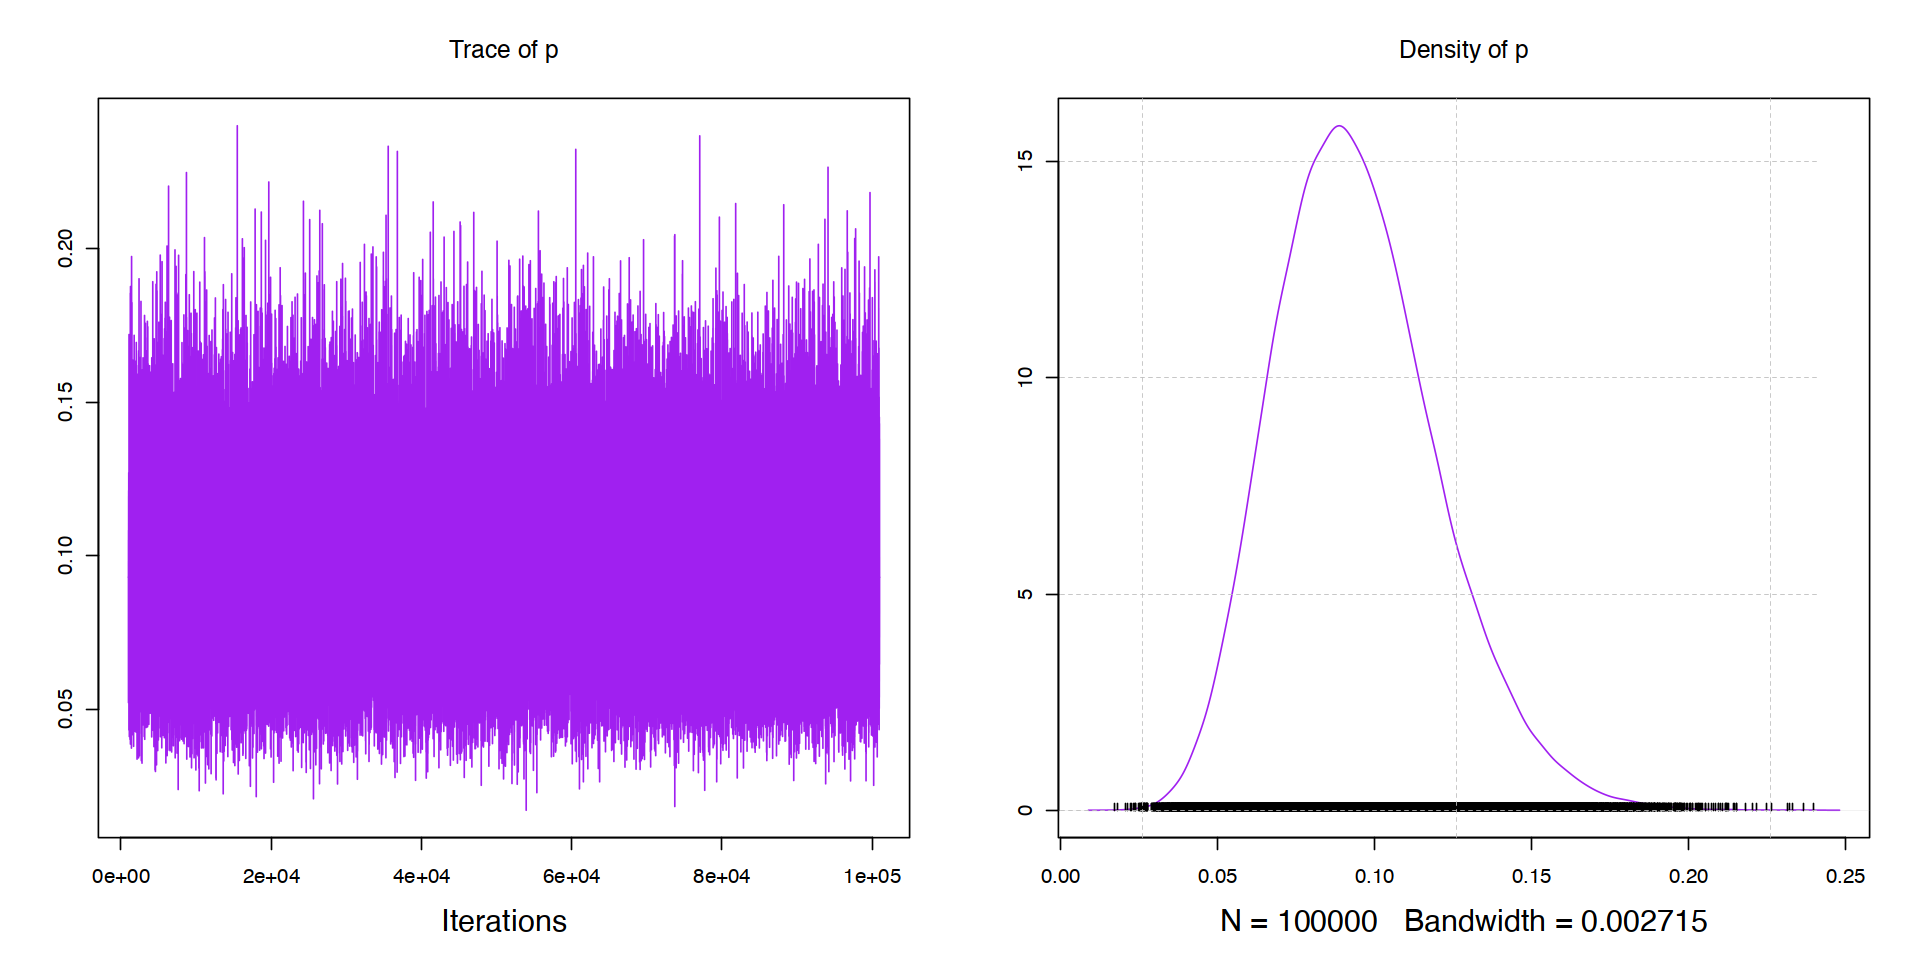

In [41]:
plot(chain, col = 'purple', cex.lab = 1.5)
grid(nx = NULL, ny = NULL,
	lty = 2, lwd = 0.5,
	col = 'gray')


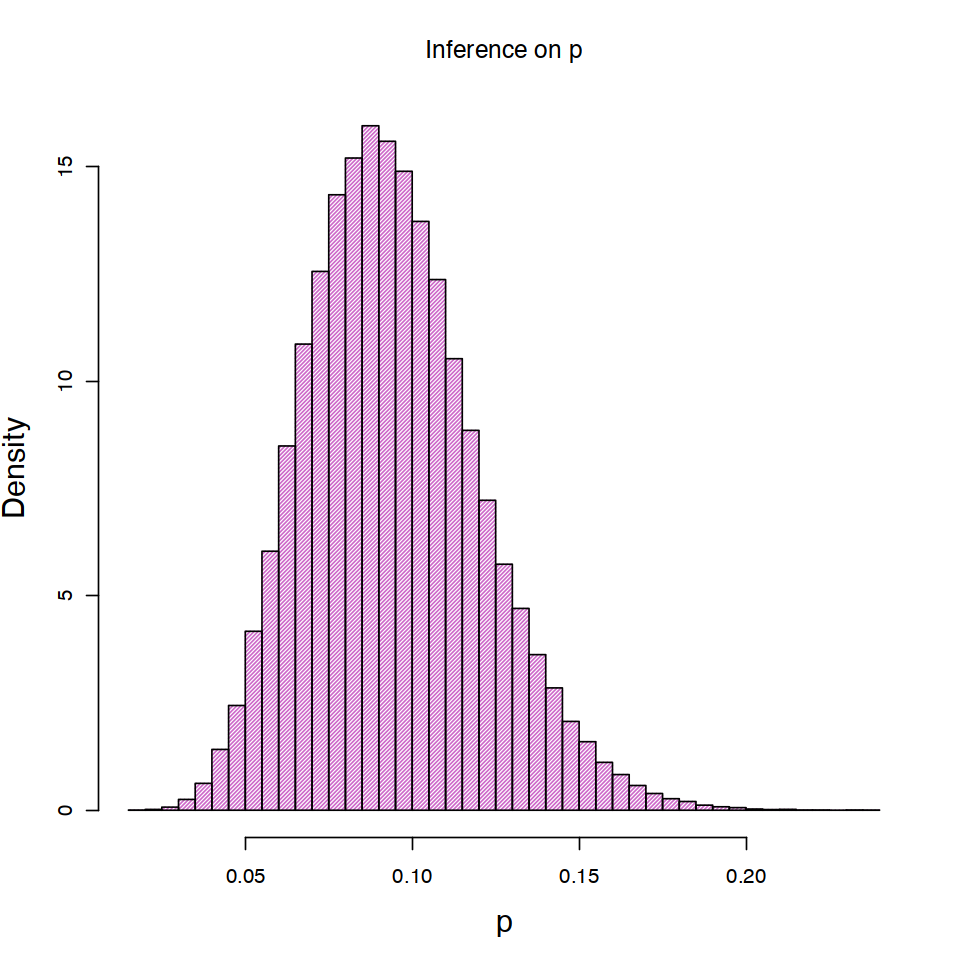

In [54]:
# format the chain as data frame
chain_df <- as.data.frame(as.mcmc(chain))

# histogram the inference on p
options(repr.plot.width = 8, repr.plot.height = 8)
hist(chain_df$p, nc = 50, prob = TRUE,
col = 'orchid3', angle = 45, density = 50, border = 1,
xlab = 'p', cex.lab = 1.5,
main = sprintf('Inference on p'))

In [63]:
summary <- summary(chain)

# extrapolate the values from the chain
cat(paste("The mean value for p is: ", round(summary$statistics[[1]], 3),
"\n The variance is: ", round(summary$statistics[[2]], 3),
"\n and the 95% credible interval is: ", round(summary$quantiles[[1]], 3), "-", round(summary$quantiles[[5]], 3)))

The mean value for p is:  0.094 
 The variance is:  0.026 
 and the 95% credible interval is:  0.05 - 0.151